# Trabajo Practico 2 - Laboratorio de Datos

Integrantes:

- Santiago Romero
- Lucio
- Juan Francisco Orga

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')

In [2]:
print(f'Version usada de sklerarn para el proyecto: {sklearn.__version__}')
print(f'Version usada de pandas para el proyecto: {pd.__version__}')
print(f'Version usada de numpy para el proyecto: {np.__version__}')
print(f'Version usada de seaborn para el proyecto: {sns.__version__}')

Version usada de sklerarn para el proyecto: 1.4.2
Version usada de pandas para el proyecto: 2.2.1
Version usada de numpy para el proyecto: 1.26.4
Version usada de seaborn para el proyecto: 0.13.2


## Preprocesamiento

In [3]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [4]:
datos = pd.read_csv('./FBRef2020-21.csv')

In [5]:
datos.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,19.7,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,32.1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,14.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,13.6,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.00,0.00,0.00

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 128 entries, Player to ProgPassReceived/90
dtypes: float64(115), int64(3), object(10)
memory usage: 2.8+ MB


Notemos que por la gran cantidad de columnas el metodo *info()* no nos muestra, como lo suele hacer, la informacion principal para cada columna.

In [7]:
# Imprimir información de las columnas: nombre, tipo de dato y cantidad de valores nulos
def imprimir_informacion_columnas(df):
    for columna in df.columns:
        nombre_columna = columna
        tipo_dato_columna = df[columna].dtype
        valores_nulos_columna = df[columna].isnull().sum()
        print(f"Columna: {nombre_columna}, Tipo: {tipo_dato_columna}, Valores Nulos: {valores_nulos_columna}")

imprimir_informacion_columnas(datos)

Columna: Player, Tipo: object, Valores Nulos: 0
Columna: Nation, Tipo: object, Valores Nulos: 0
Columna: Pos, Tipo: object, Valores Nulos: 0
Columna: Squad, Tipo: object, Valores Nulos: 0
Columna: Comp, Tipo: object, Valores Nulos: 0
Columna: Age, Tipo: float64, Valores Nulos: 1
Columna: Born, Tipo: float64, Valores Nulos: 1
Columna: MP, Tipo: int64, Valores Nulos: 0
Columna: Starts, Tipo: int64, Valores Nulos: 0
Columna: Min, Tipo: int64, Valores Nulos: 0
Columna: 90s, Tipo: float64, Valores Nulos: 0
Columna: Ast/90, Tipo: float64, Valores Nulos: 0
Columna: npG/90, Tipo: float64, Valores Nulos: 0
Columna: npG+A/90, Tipo: float64, Valores Nulos: 0
Columna: xA/90, Tipo: float64, Valores Nulos: 3
Columna: npxG/90, Tipo: float64, Valores Nulos: 3
Columna: npxG+xA/90, Tipo: float64, Valores Nulos: 3
Columna: Shots/90, Tipo: float64, Valores Nulos: 0
Columna: SoTs/90, Tipo: float64, Valores Nulos: 0
Columna: SoT%, Tipo: float64, Valores Nulos: 540
Columna: Gls/Shot, Tipo: float64, Valores N

In [8]:
# Eliminamos a los jugadores que jugaron menos de 500 minutos en la temporada
datos = datos[datos['Min'] >= 500]

# Eliminamos las columnas con más de 100 datos faltantes
datos = datos.dropna(thresh=len(datos) - 100, axis=1)

# Eliminamos las filas con datos faltantes
datos = datos.dropna()

# Reseteamos los índices
datos.reset_index(drop=True, inplace=True)

# Definimos el DataFrame 'data_num' que solo contenga las variables numéricas a partir de la columna Ast/90
columnas_numericas = datos.select_dtypes(include=['number']).columns
indice_inicio = columnas_numericas.get_loc('Ast/90')
data_num = datos[columnas_numericas[indice_inicio:]]

In [9]:
data_num.head()

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,LiveTchs/90,SuccDrib/90,AttDrib/90,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,57.2,0.46,1.07,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,63.2,0.37,0.62,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,59.3,0.36,0.43,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.25,0.96,0.74,0.37,0.15,0.59,1.47,40.0,0.88,10.60,4.71,44.4,5.96,3.46,1.18,1.91,0.37,1.54,1.10,2.43,0.00,58.3,4.04,23.7,31.0,7.35,0.59,54.3,0.22,0.44,0.29,0.00,32.0,169.9,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,57.6,65.0,88.6,1234.2,333.6,17.80,19.30,92.2,27.7,29.3,94.4,11.00,14.60,75.4,0.38,3.67,0.64,0.29,3.16,61.6,3.45,1.73,0.03,5.85,2.33,0.83,46.9,6.65,11.50,49.1,10.80,2.94,0.77,0.16,0.13,0.86,0.48,0.48,1.02,0.86,0.03,0.00,0.06,0.00,0.06,0.13,0.13,0.00,0.0,0.0,0.0,0.0,1.73,1.21,1.12,0.51,0.10,0.35,1.18,29.7,0.83,11.20,4.66,41.8,6.39,3.80,0.96,1.63,0.61,1.02,1.98,5.02,0.03,76.1,11.10,39.3,37.4,6.23,0.61,72.8,0.35,0.38,0.35,0.00,46.3,313.3,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97

In [10]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Columns: 106 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(106)
memory usage: 1.5 MB


In [11]:
imprimir_informacion_columnas(data_num)

Columna: Ast/90, Tipo: float64, Valores Nulos: 0
Columna: npG/90, Tipo: float64, Valores Nulos: 0
Columna: npG+A/90, Tipo: float64, Valores Nulos: 0
Columna: xA/90, Tipo: float64, Valores Nulos: 0
Columna: npxG/90, Tipo: float64, Valores Nulos: 0
Columna: npxG+xA/90, Tipo: float64, Valores Nulos: 0
Columna: Shots/90, Tipo: float64, Valores Nulos: 0
Columna: SoTs/90, Tipo: float64, Valores Nulos: 0
Columna: FKSht/90, Tipo: float64, Valores Nulos: 0
Columna: np:G-xG, Tipo: float64, Valores Nulos: 0
Columna: PassCmp/90, Tipo: float64, Valores Nulos: 0
Columna: PassAtt/90, Tipo: float64, Valores Nulos: 0
Columna: PassCmp%, Tipo: float64, Valores Nulos: 0
Columna: TotDistPass/90, Tipo: float64, Valores Nulos: 0
Columna: PrgDistPass/90, Tipo: float64, Valores Nulos: 0
Columna: ShortCmp/90, Tipo: float64, Valores Nulos: 0
Columna: ShortAtt/90, Tipo: float64, Valores Nulos: 0
Columna: ShortCmp%, Tipo: float64, Valores Nulos: 0
Columna: MedCmp/90, Tipo: float64, Valores Nulos: 0
Columna: MedAtt

## Clustering

Nuestro primer objetivo es realizar algun agrupamiento de jugadores con caracterısticas similares.

 ### (a) Seleccionar dos variables cualesquiera de los datos y realizar un grafico de dispersion de una variable en funcion de la otra para el total de las observaciones.

 - ¿Pueden encontrar facilmente grupos distintos?

Consideramos interesante ver la relacion entre los goles convertidos y esperados para cada jugador, ya que podria darnos una idea de los jugadores que estan cumpliendo con las expectativas goleadores puesta en ellos, los que no lo estan haciendo y los que estan teniendo un rendimiento mayor del esperado.

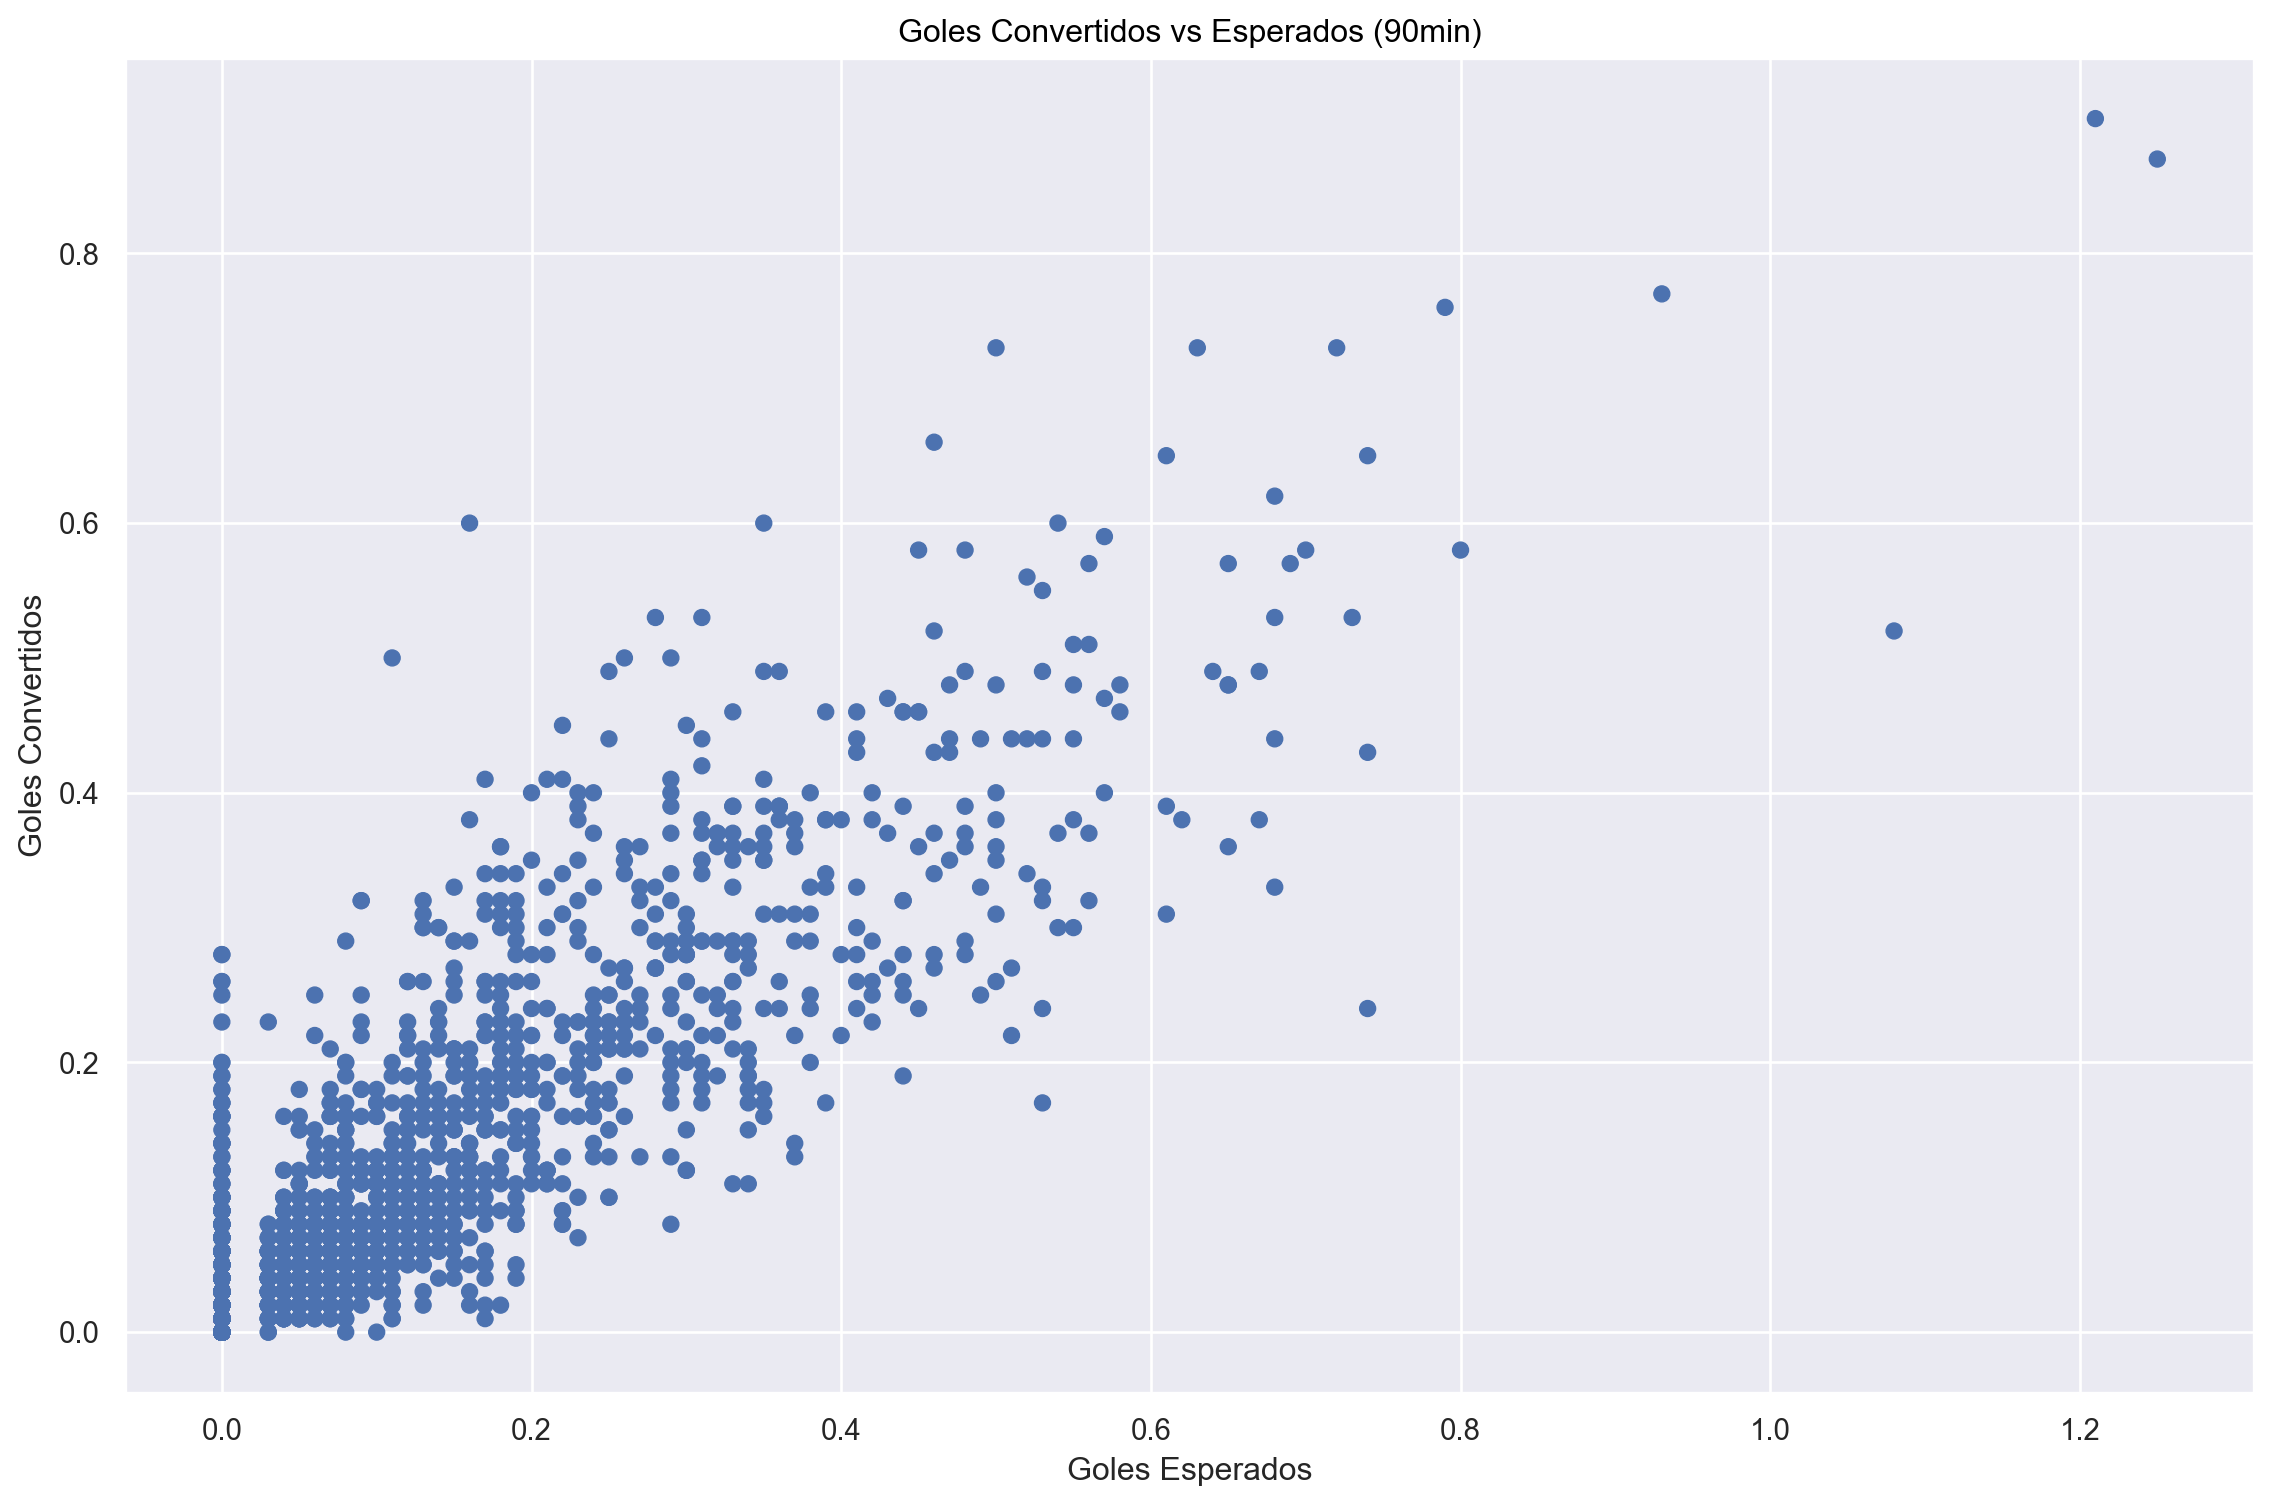

In [12]:
(
  so.Plot(data=data_num, x='npG/90', y='npxG/90')
  .layout(size=(12,8))
  .add(so.Dot())
  .label(
      x='Goles Esperados', y='Goles Convertidos',
      title='Goles Convertidos vs Esperados (90min)'
    )
)

Podemos notar que no es un trabajo sencillo encontrar distintos grupos para la distribucion de los jugadores con respecto a estas varibles.

### (b) Escalar los datos y realizar un analisis de componentes principales, quedandose solo con las dos primeras componentes. Realizar un grafico como el del punto anterior.

- ¿Cuantos clusters puede distinguir en el grafico?
- ¿A que caracterısticas de los jugadores pueden corresponder los clusters?
- ¿Como pueden verificar su conjetura?

Busquemos ahora los componentes mas representativos de los datos y hagamos nuevamente el analisis hecho recientemente.

In [13]:
# Escalar los datos numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Realizar el análisis de componentes principales (PCA)
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_scaled) # Devuelve los valores transformados de los 'n' componentes transformados
print(componentes_principales.shape)

(1902, 2)


In [14]:
componentes_principales

array([[-2.91448921,  2.25129977],
       [-6.81841064, -1.41378946],
       [-6.47428099, -3.79253435],
       ...,
       [ 6.80094942,  1.47030389],
       [ 6.84863946, -0.87812123],
       [ 2.45963356,  2.03690652]])

Podemos observar los valores de los componentes principales despues de ser transformados y la dimension de los mismos, notemos como mantuvimos la cantidad de filas pero ahora unicamente con nuestras 2 variables mas 'representativas'. Veamos ahora la informacion mas importante de estas.

In [15]:
# Varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_

# Proporción de varianza explicada por cada componente principal
prop_varianza_explicada = pca.explained_variance_ratio_ #OBS: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

# Varianza acumulada explicada
varianza_acumulada = np.cumsum(prop_varianza_explicada)

print("Varianza explicada por cada componente principal:", varianza_explicada)
print("Proporción de varianza explicada por cada componente:", prop_varianza_explicada)
print("Varianza acumulada explicada:", varianza_acumulada)

Varianza explicada por cada componente principal: [29.40272413 21.87234121]
Proporción de varianza explicada por cada componente: [0.27723835 0.20623435]
Varianza acumulada explicada: [0.27723835 0.48347271]


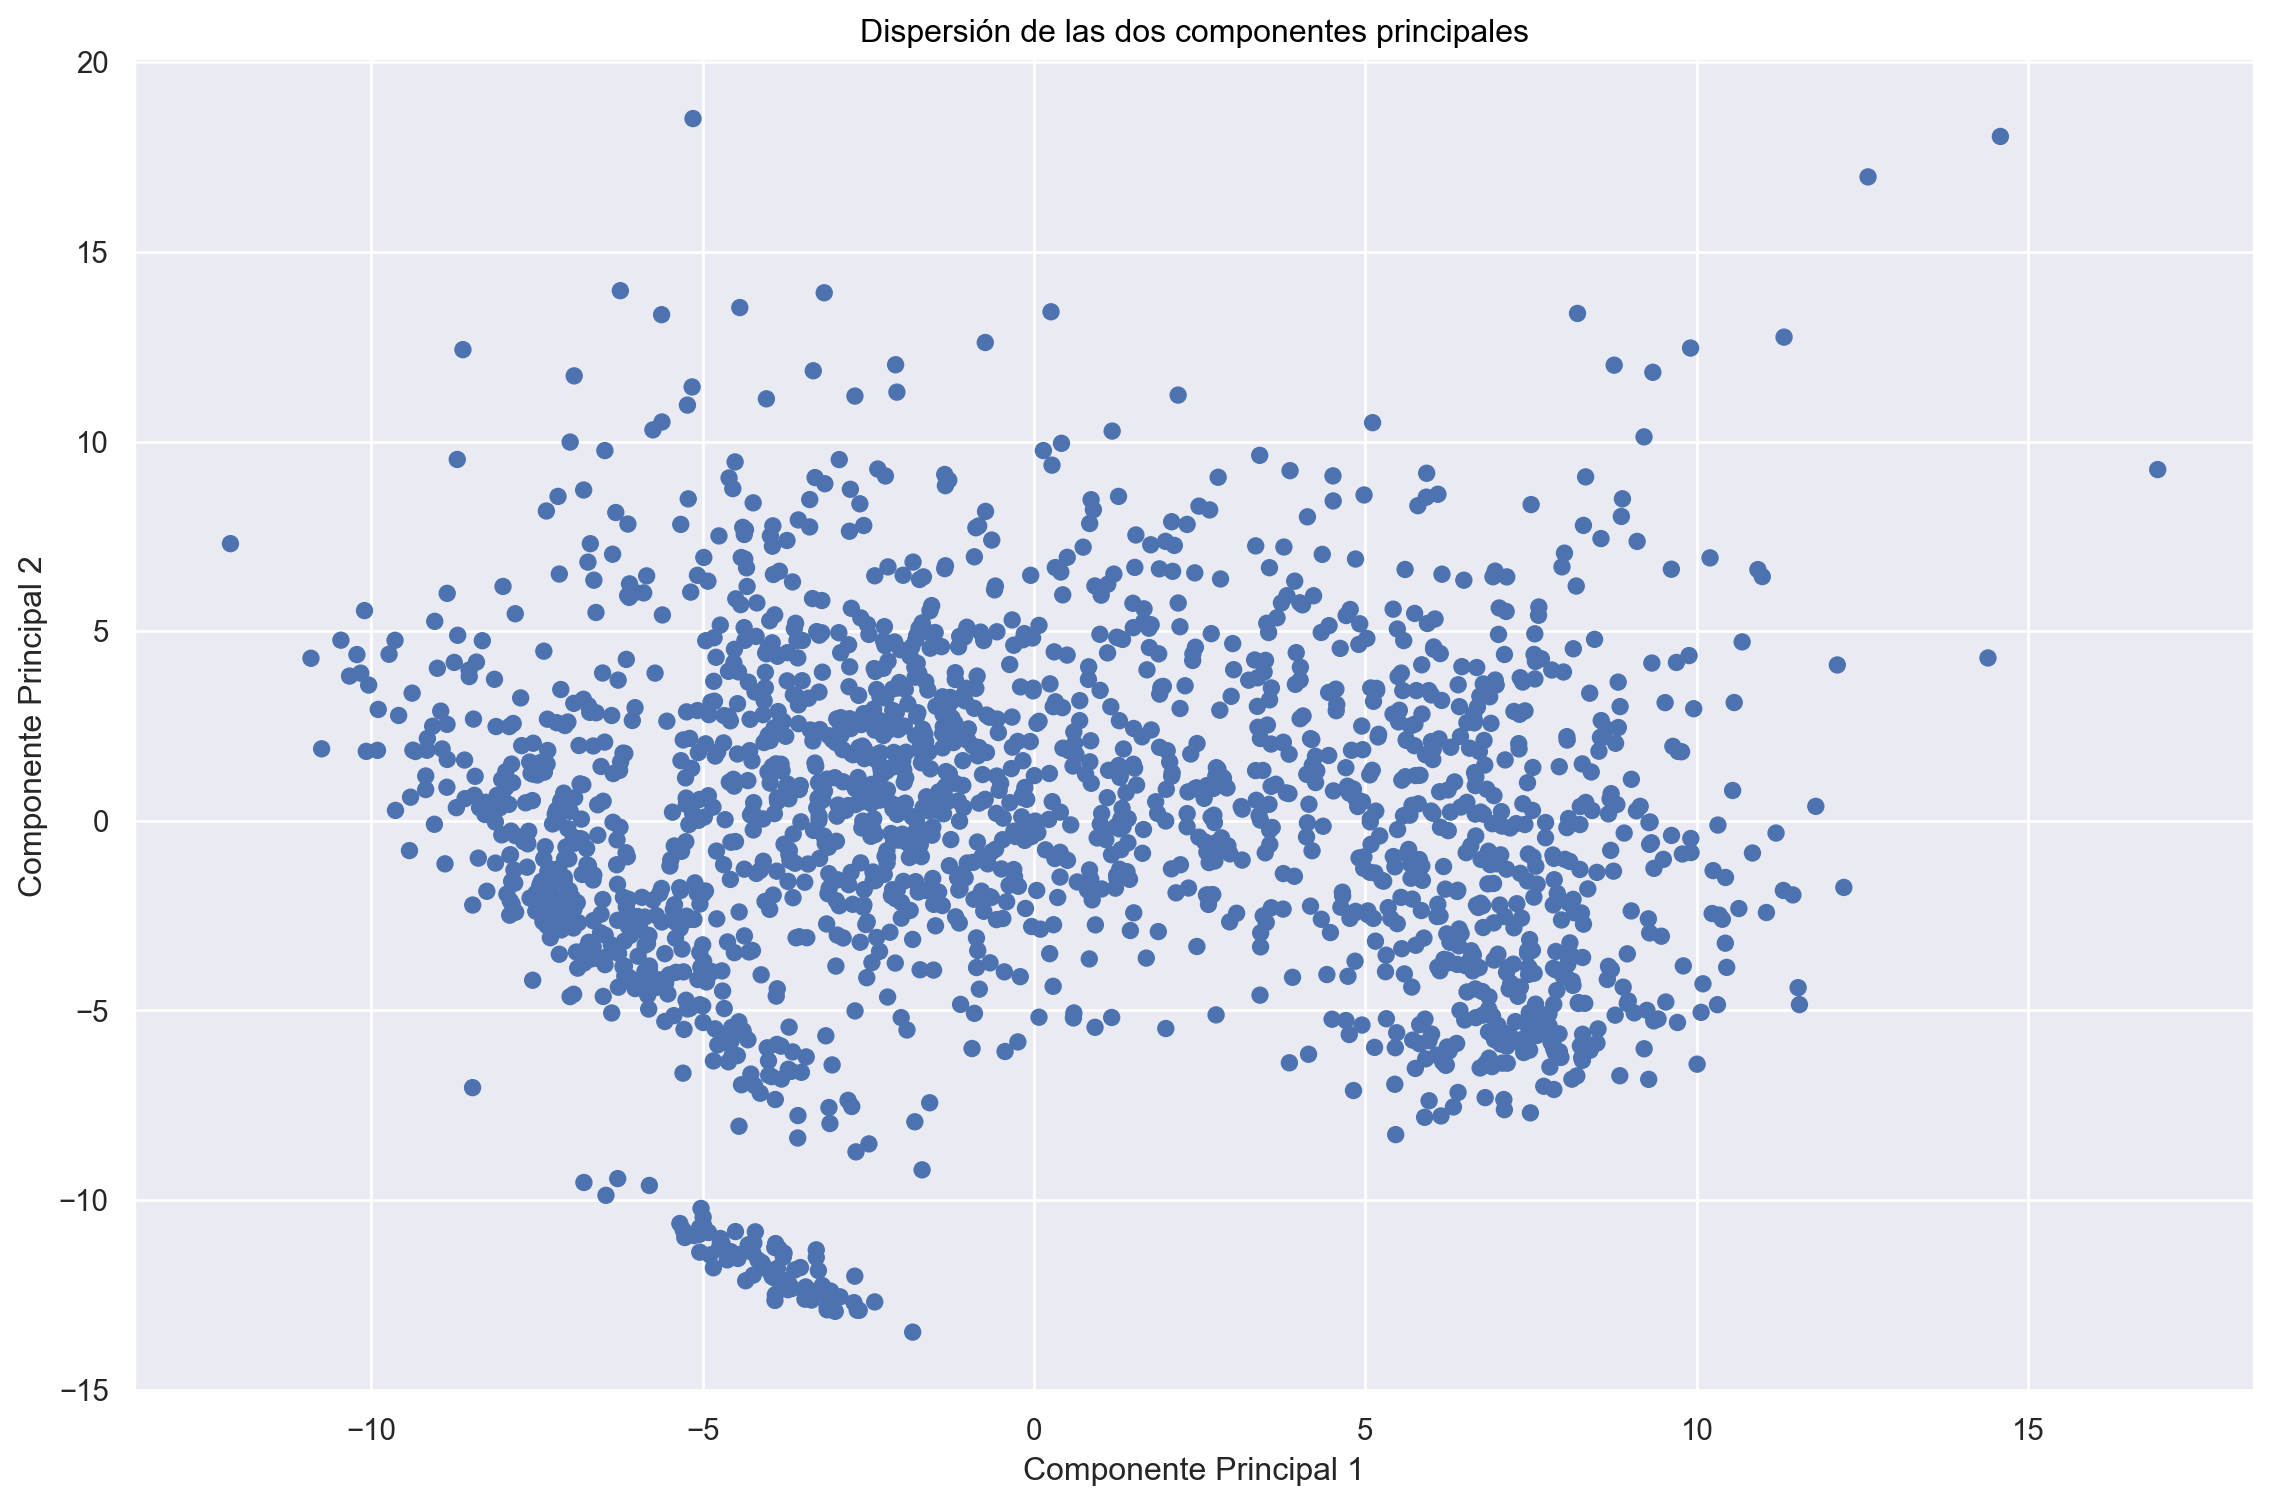

In [16]:
# Gráfico de dispersión de las dos primeras componentes principales usando seaborn objects
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1]) #pca_df, x='Componente Principal 1', y='Componente Principal 2')
  .layout(size=(12,8))
  .add(so.Dot())
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='Dispersión de las dos componentes principales'
    )
)


- ¿Cuantos clusters puede distinguir en el grafico?

Realmente, viendolo a ojo es claro que K-means no es el algoritmo ideal para este tipo de distribucion de los datos, y en consecuencia de esto tampoco es facil distinguir claramente distintos clusters. Recordemos que una de los requesitos, tal vez el mas importante, para que no falle el algoritmos es que los clusters son esfericos e isotropicos, lo cual no esta sucediendo. Habiendo dicho esto, vamos a reflejar graficamente algunos posibles centros para los distintos clusters, personalmente creemos que pueden llegar a ser 4.

In [17]:
hipoteticos_centros = np.array([[-3.75, -12], [-7, -2.5], [-2, 2.5], [7,0]])

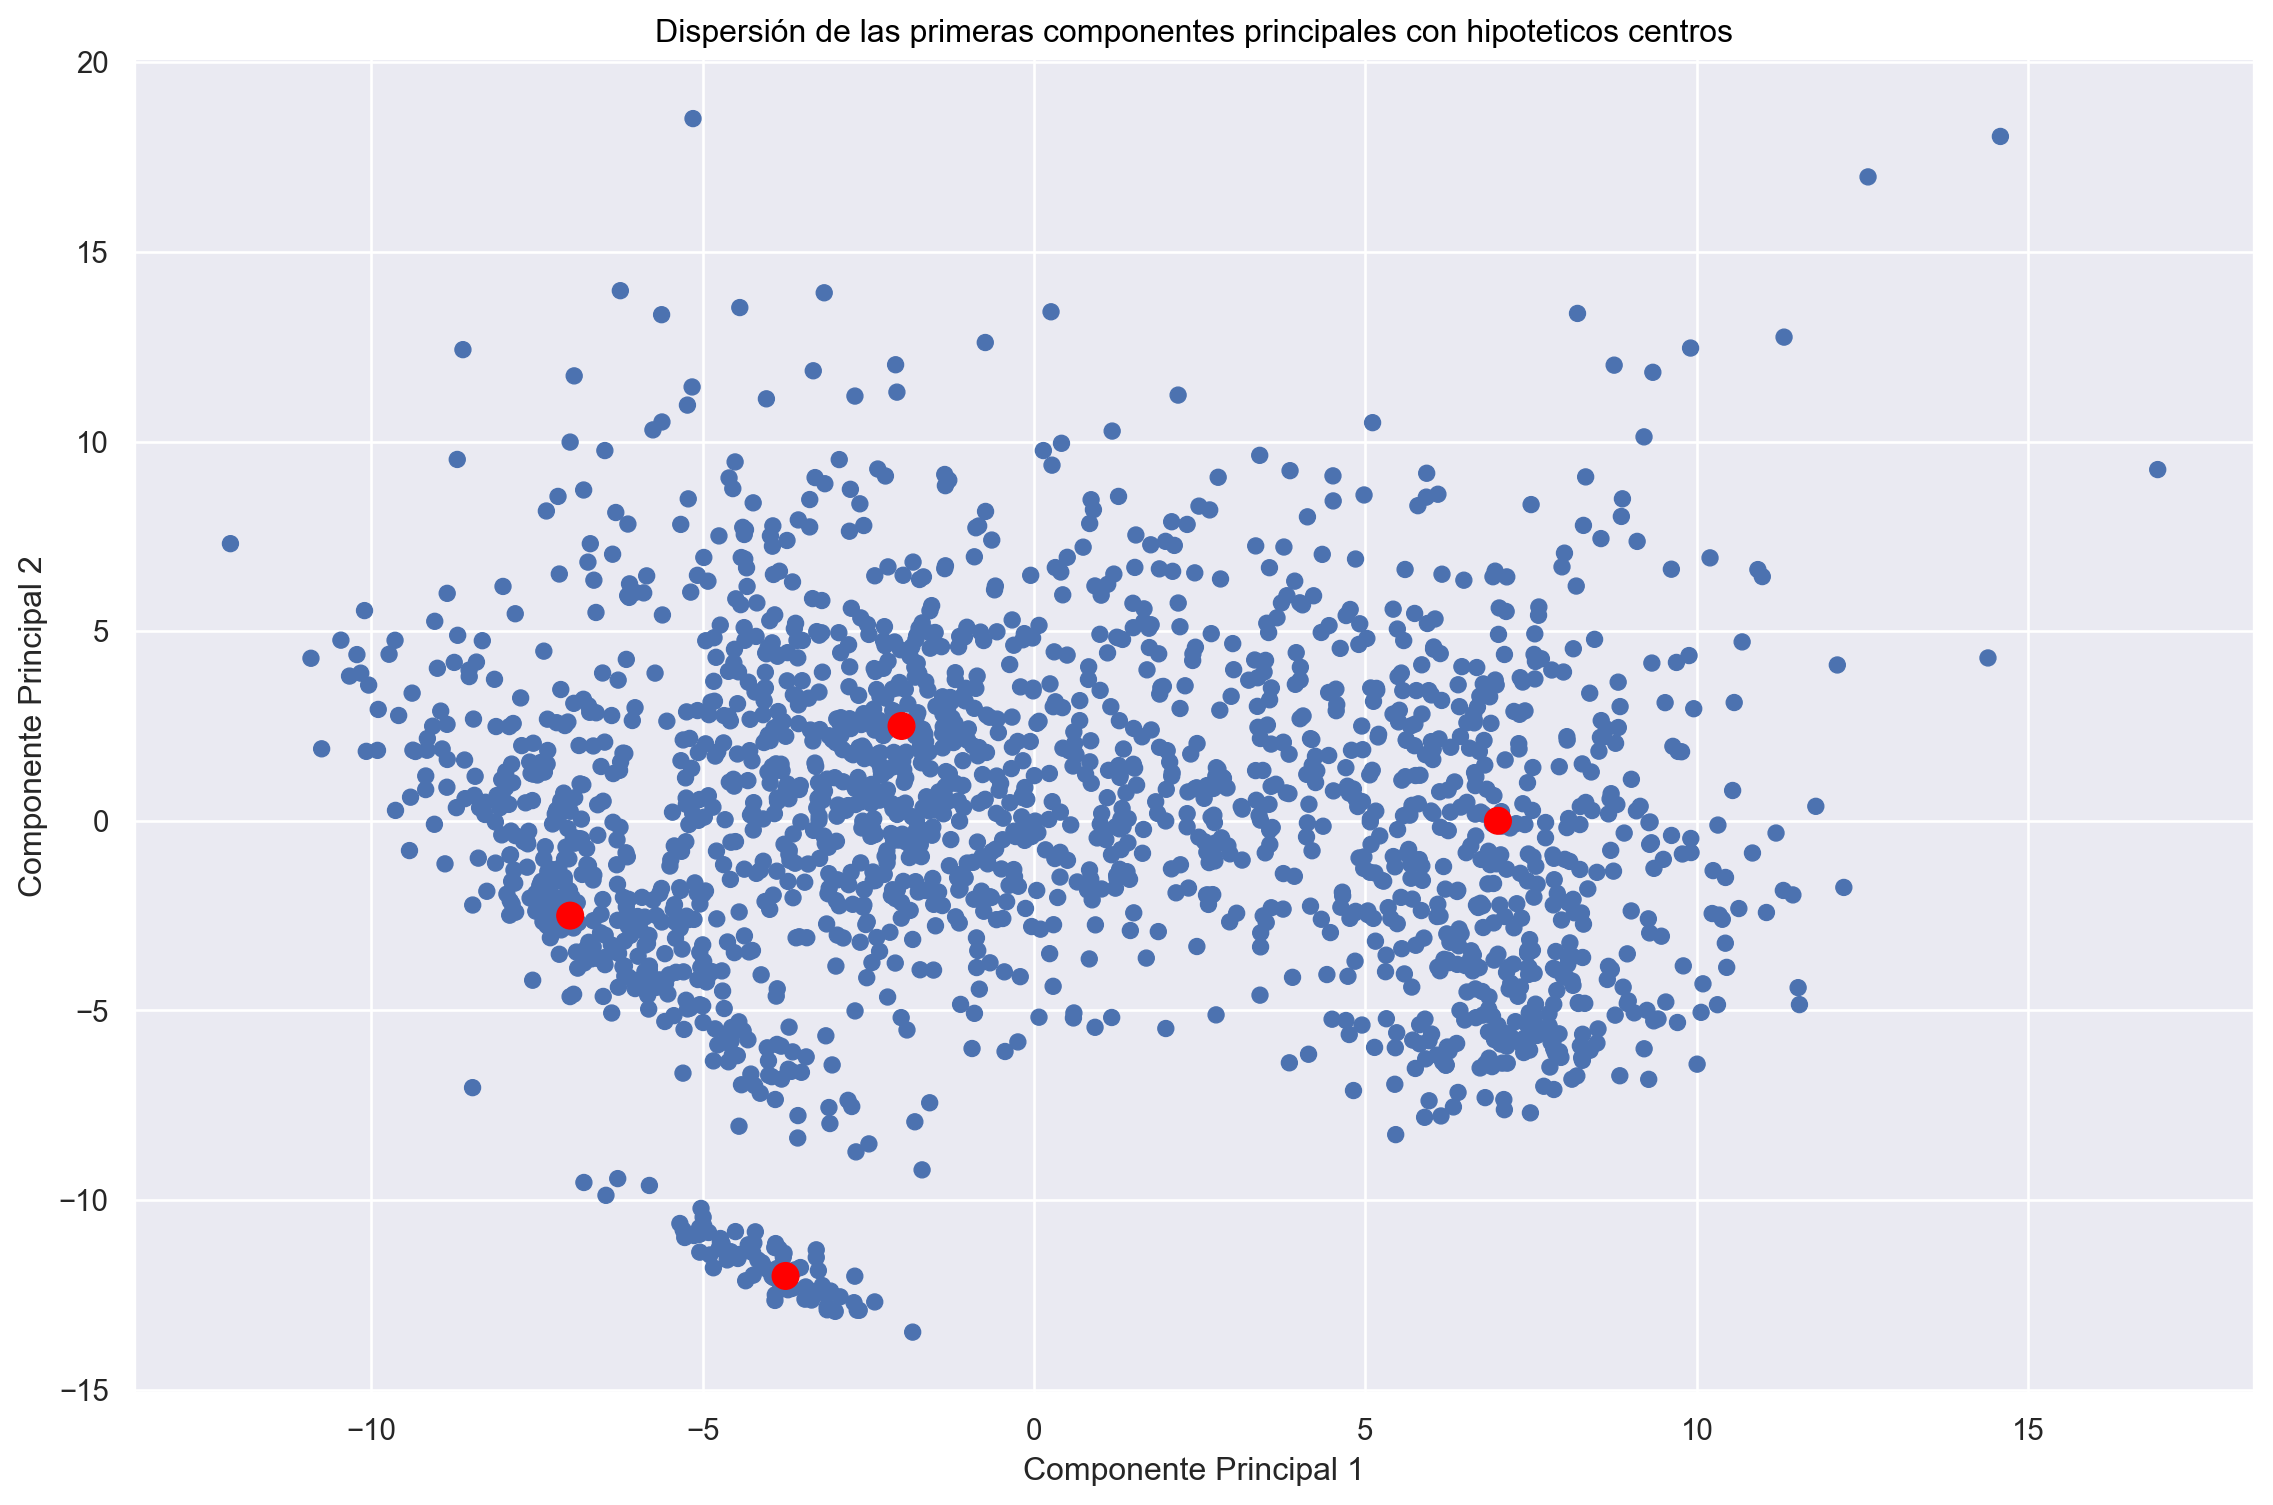

In [18]:
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
  .layout(size=(12,8))
  .add(so.Dot())
  .add(so.Dot(color = "red", pointsize= 10), x = hipoteticos_centros[:,0], y = hipoteticos_centros[:,1])
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='Dispersión de las primeras componentes principales con hipoteticos centros'
    )
)

- ¿A que caracterısticas de los jugadores pueden corresponder los clusters?

Esto se puede ver con un analisis de la influencia de de cada variable original para cada componente, ya que estas corresponden justamente a las distintas caracteristicas de los jugaadores.

In [19]:
# Crear el DataFrame original
pca_influencias = pd.DataFrame(data=pca.components_.T, columns=['Componente Principal 1', 'Componente Principal 2'], index=data_num.columns)

# Extraer los 10 valores máximos para cada componente principal
max_10_pc1 = pca_influencias['Componente Principal 1'].nlargest(10)
max_10_pc2 = pca_influencias['Componente Principal 2'].nlargest(10)

# Crear DataFrames con los 10 valores máximos
df_max_10_pc1 = pd.DataFrame(max_10_pc1)
df_max_10_pc2 = pd.DataFrame(max_10_pc2)

# Mostrar los DataFrames
display(df_max_10_pc1)
display(df_max_10_pc2)


,Componente Principal 1
ProgPassReceived/90,0.167968
Miscontrol/90,0.160085
Att PenTchs/90,0.159957
Att 3rdPress/90,0.158074
npxG+xA/90,0.155862
Shots/90,0.151770
SoTs/90,0.149002
npxG/90,0.144932
Dispossessed/90,0.144000
npG+A/90,0.139555


,Componente Principal 2
ProgPass/90,0.183096
ShortAtt/90,0.182445
Carries/90,0.180202
ShortCmp/90,0.177666
PassesReceived/90,0.173631
ProgCarry/90,0.172332
Mid 3rdTchs/90,0.168084
PassTarget/90,0.165025
LiveTchs/90,0.164377
Touches/90,0.163771


- ¿Como pueden verificar su conjetura?

Una buena manera es ir a los hechos, entrenar un K-means con 4 clusters y ver cuales son, efectivamente los centros de los mismos y compararlos visualmente con los observados a 'ojo'.

### (c) Para la cantidad de clusters observados en el ıtem anterior, realizar un agrupamiento por k-medias, y colorear los puntos segun las etiquetas obtenidas.

- ¿Coinciden las etiquetas con lo esperado?

In [20]:
kmeans = KMeans(n_clusters=4)
etiquetas = kmeans.fit_predict(componentes_principales)
print(f'Los mejores centros para 4 clusters: {kmeans.cluster_centers_}')

Los mejores centros para 4 clusters: [[ 6.71227593 -3.11224428]
 [-3.81049452  2.8670321 ]
 [ 4.52638656  3.66411856]
 [-4.31172444 -4.76031955]]


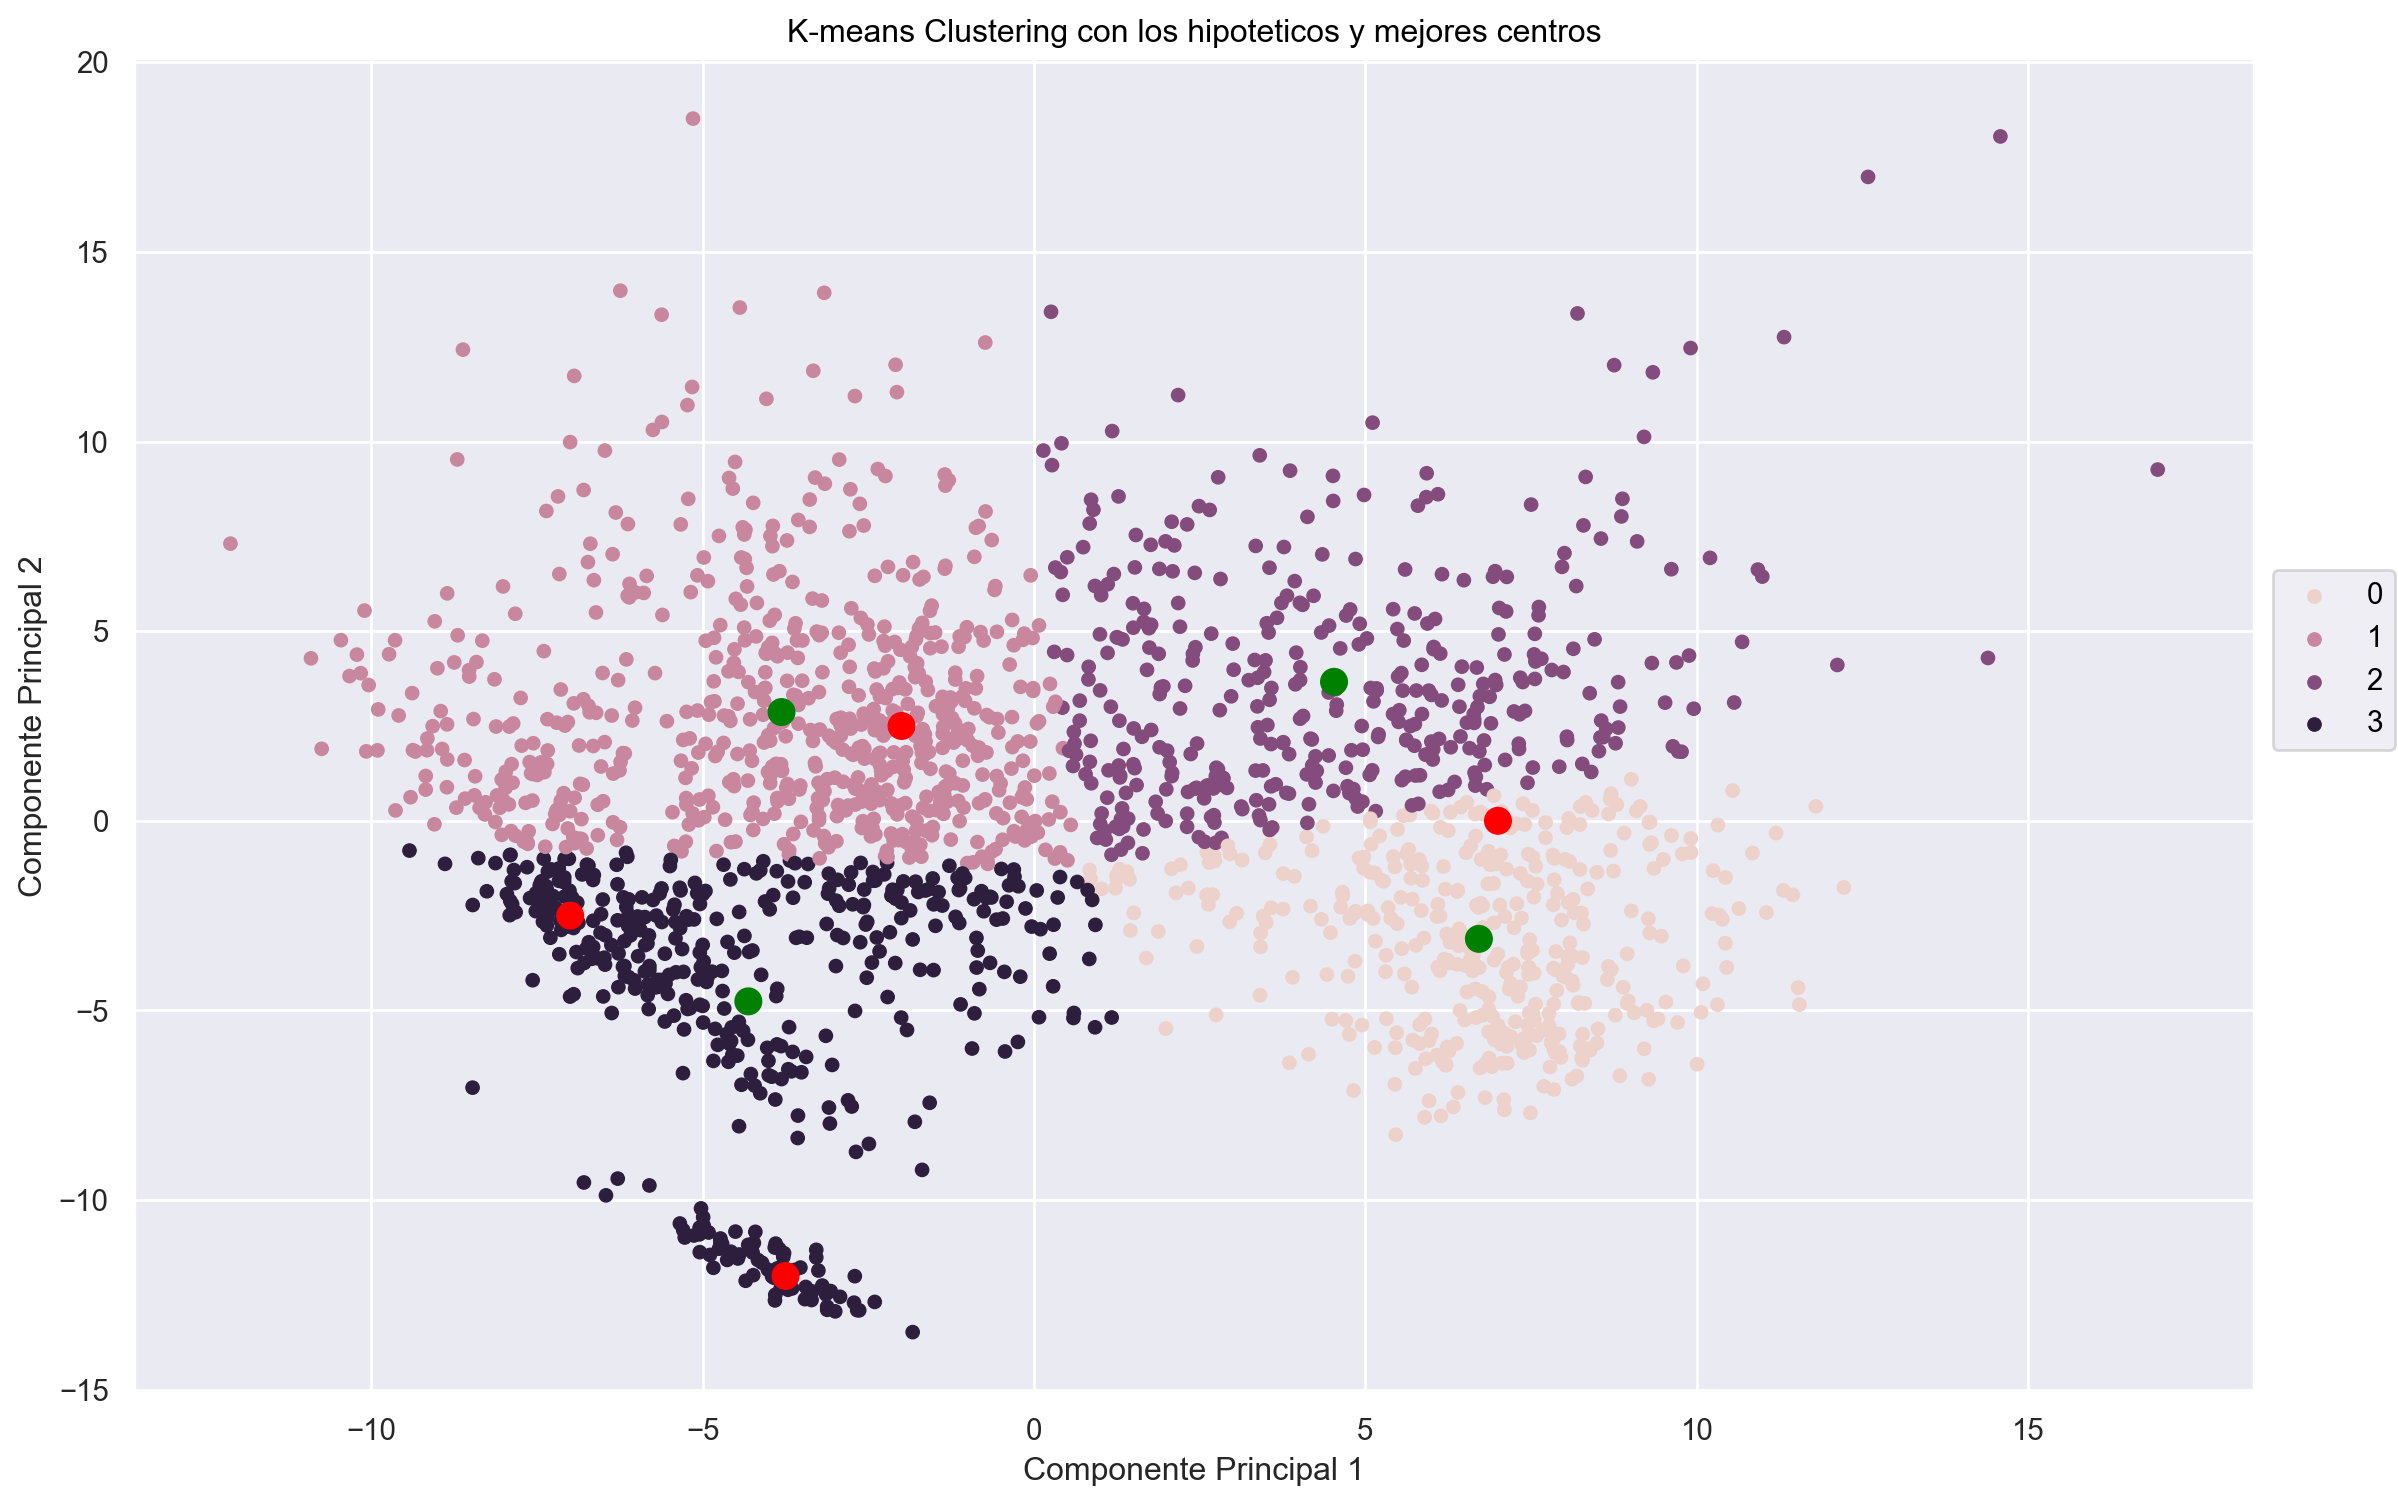

In [21]:
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
  .layout(size=(12,8))
  .add(so.Dot(pointsize=5), color = etiquetas)
  .add(so.Dot(color = "red", pointsize= 10), x = hipoteticos_centros[:,0], y = hipoteticos_centros[:,1])
  .add(so.Dot(color = "green", pointsize= 10), x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1])
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='K-means Clustering con los hipoteticos y mejores centros'
    )
)

Si bien los centros elegidos a 'ojo' no estan muy acertados, tampoco estaban tan errados. Misma idea para las etiquetas.

### (d) Repetir el agrupamiento utilizando DBSCAN.

- ¿Como eligirıan en este caso un valor de ε apropiado?

Una forma vista en clase seria elegir un *'eps'* mas chico que la distancia que vemos entre clusters. Si bien no lo requiere la consiga, aprovechamos la otra recomendacion vista en clase y elegimos *'min_samples'* según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?).

Como en este caso podemos ver un cluster claramente separado del otro 'gran' cluster, vamos a usar estos dos como nuestra referencia. Para este caso seria un valor de *'eps'* de 2 y para *'min_samples'* de 15.

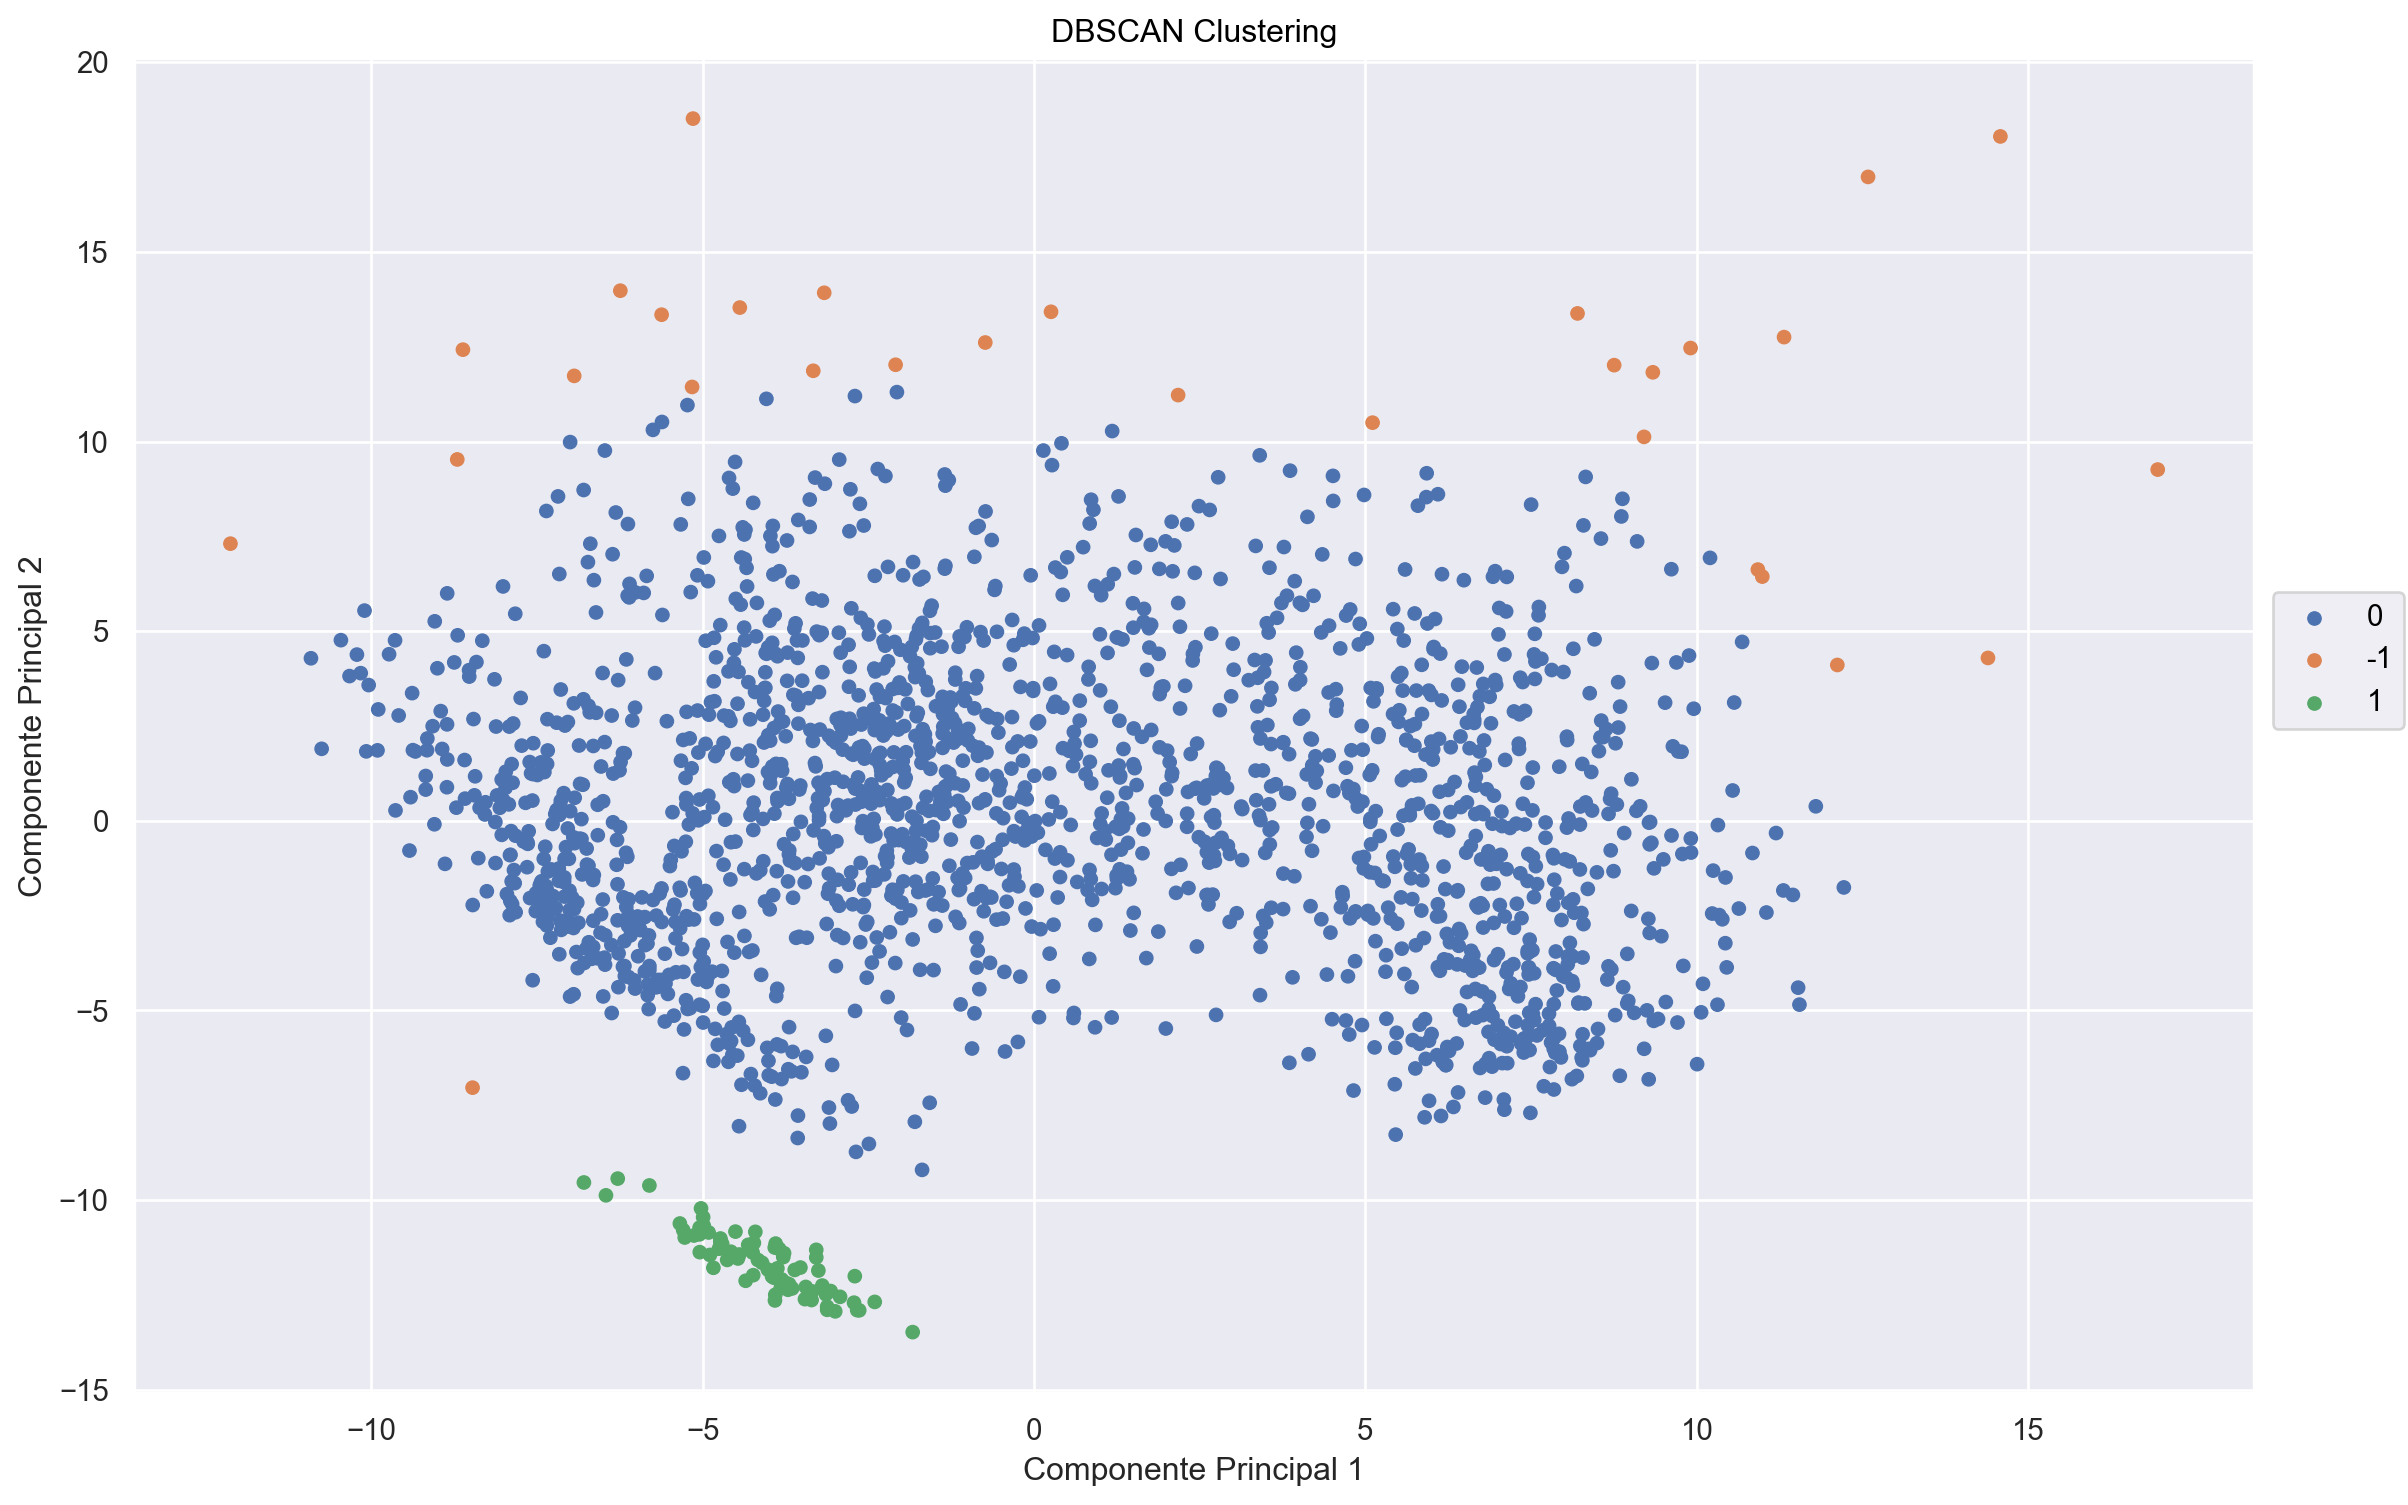

In [22]:
dbscan = DBSCAN(eps=2, min_samples=15)
etiquetas = dbscan.fit_predict(componentes_principales)

(
    so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
    .layout(size=(12,8))
    .add(so.Dot(pointsize=5), color = etiquetas.astype('str'))
    .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='DBSCAN Clustering'
    )
)

In [23]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

Notemos que se formaron 2 clusters, como esperabamos segun los valores elegidos para nuestros hiperparametros, y por el otro lado vale aclarar que el '-1' corresponde a los outliers.

En clase se introdujo el metodo del 'codo', veamos su implementacion. La idea es seleccionar el valor de 'eps' en donde se hace un codo el grafico, de esta forma tenemos un valor chico que incluye a la mayoria de los datos.

In [24]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(componentes_principales)

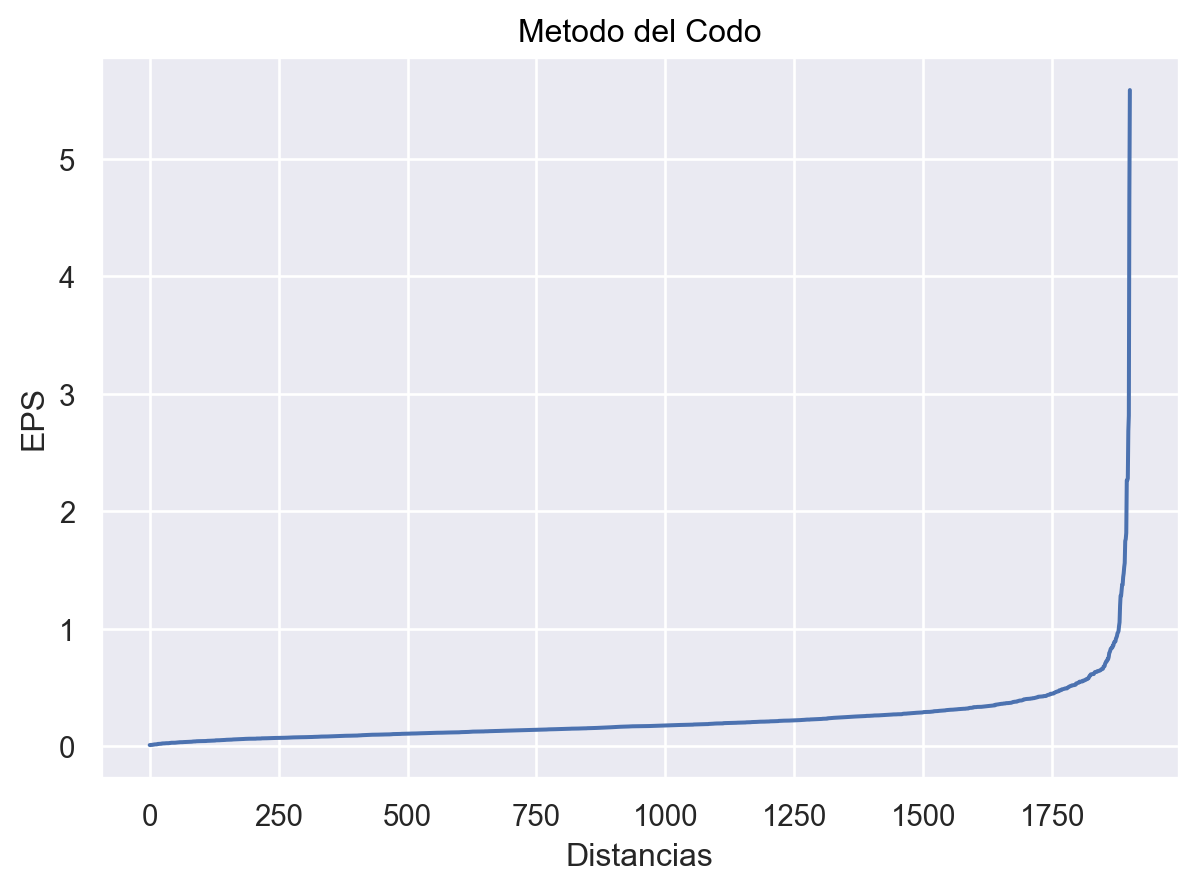

In [25]:
# Ordenamos de menor a mayor las distancias y graficamos
distances, indices = neighbors_fit.kneighbors(componentes_principales)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# Visualizaicion del metodo
(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .label(
    x='Distancias', y='EPS',
    title='Metodo del Codo'
    )
)

Bien, vamos a usar un valor cercano al 0,75 y mantengamos el elegido previamente para *'min_pts'*

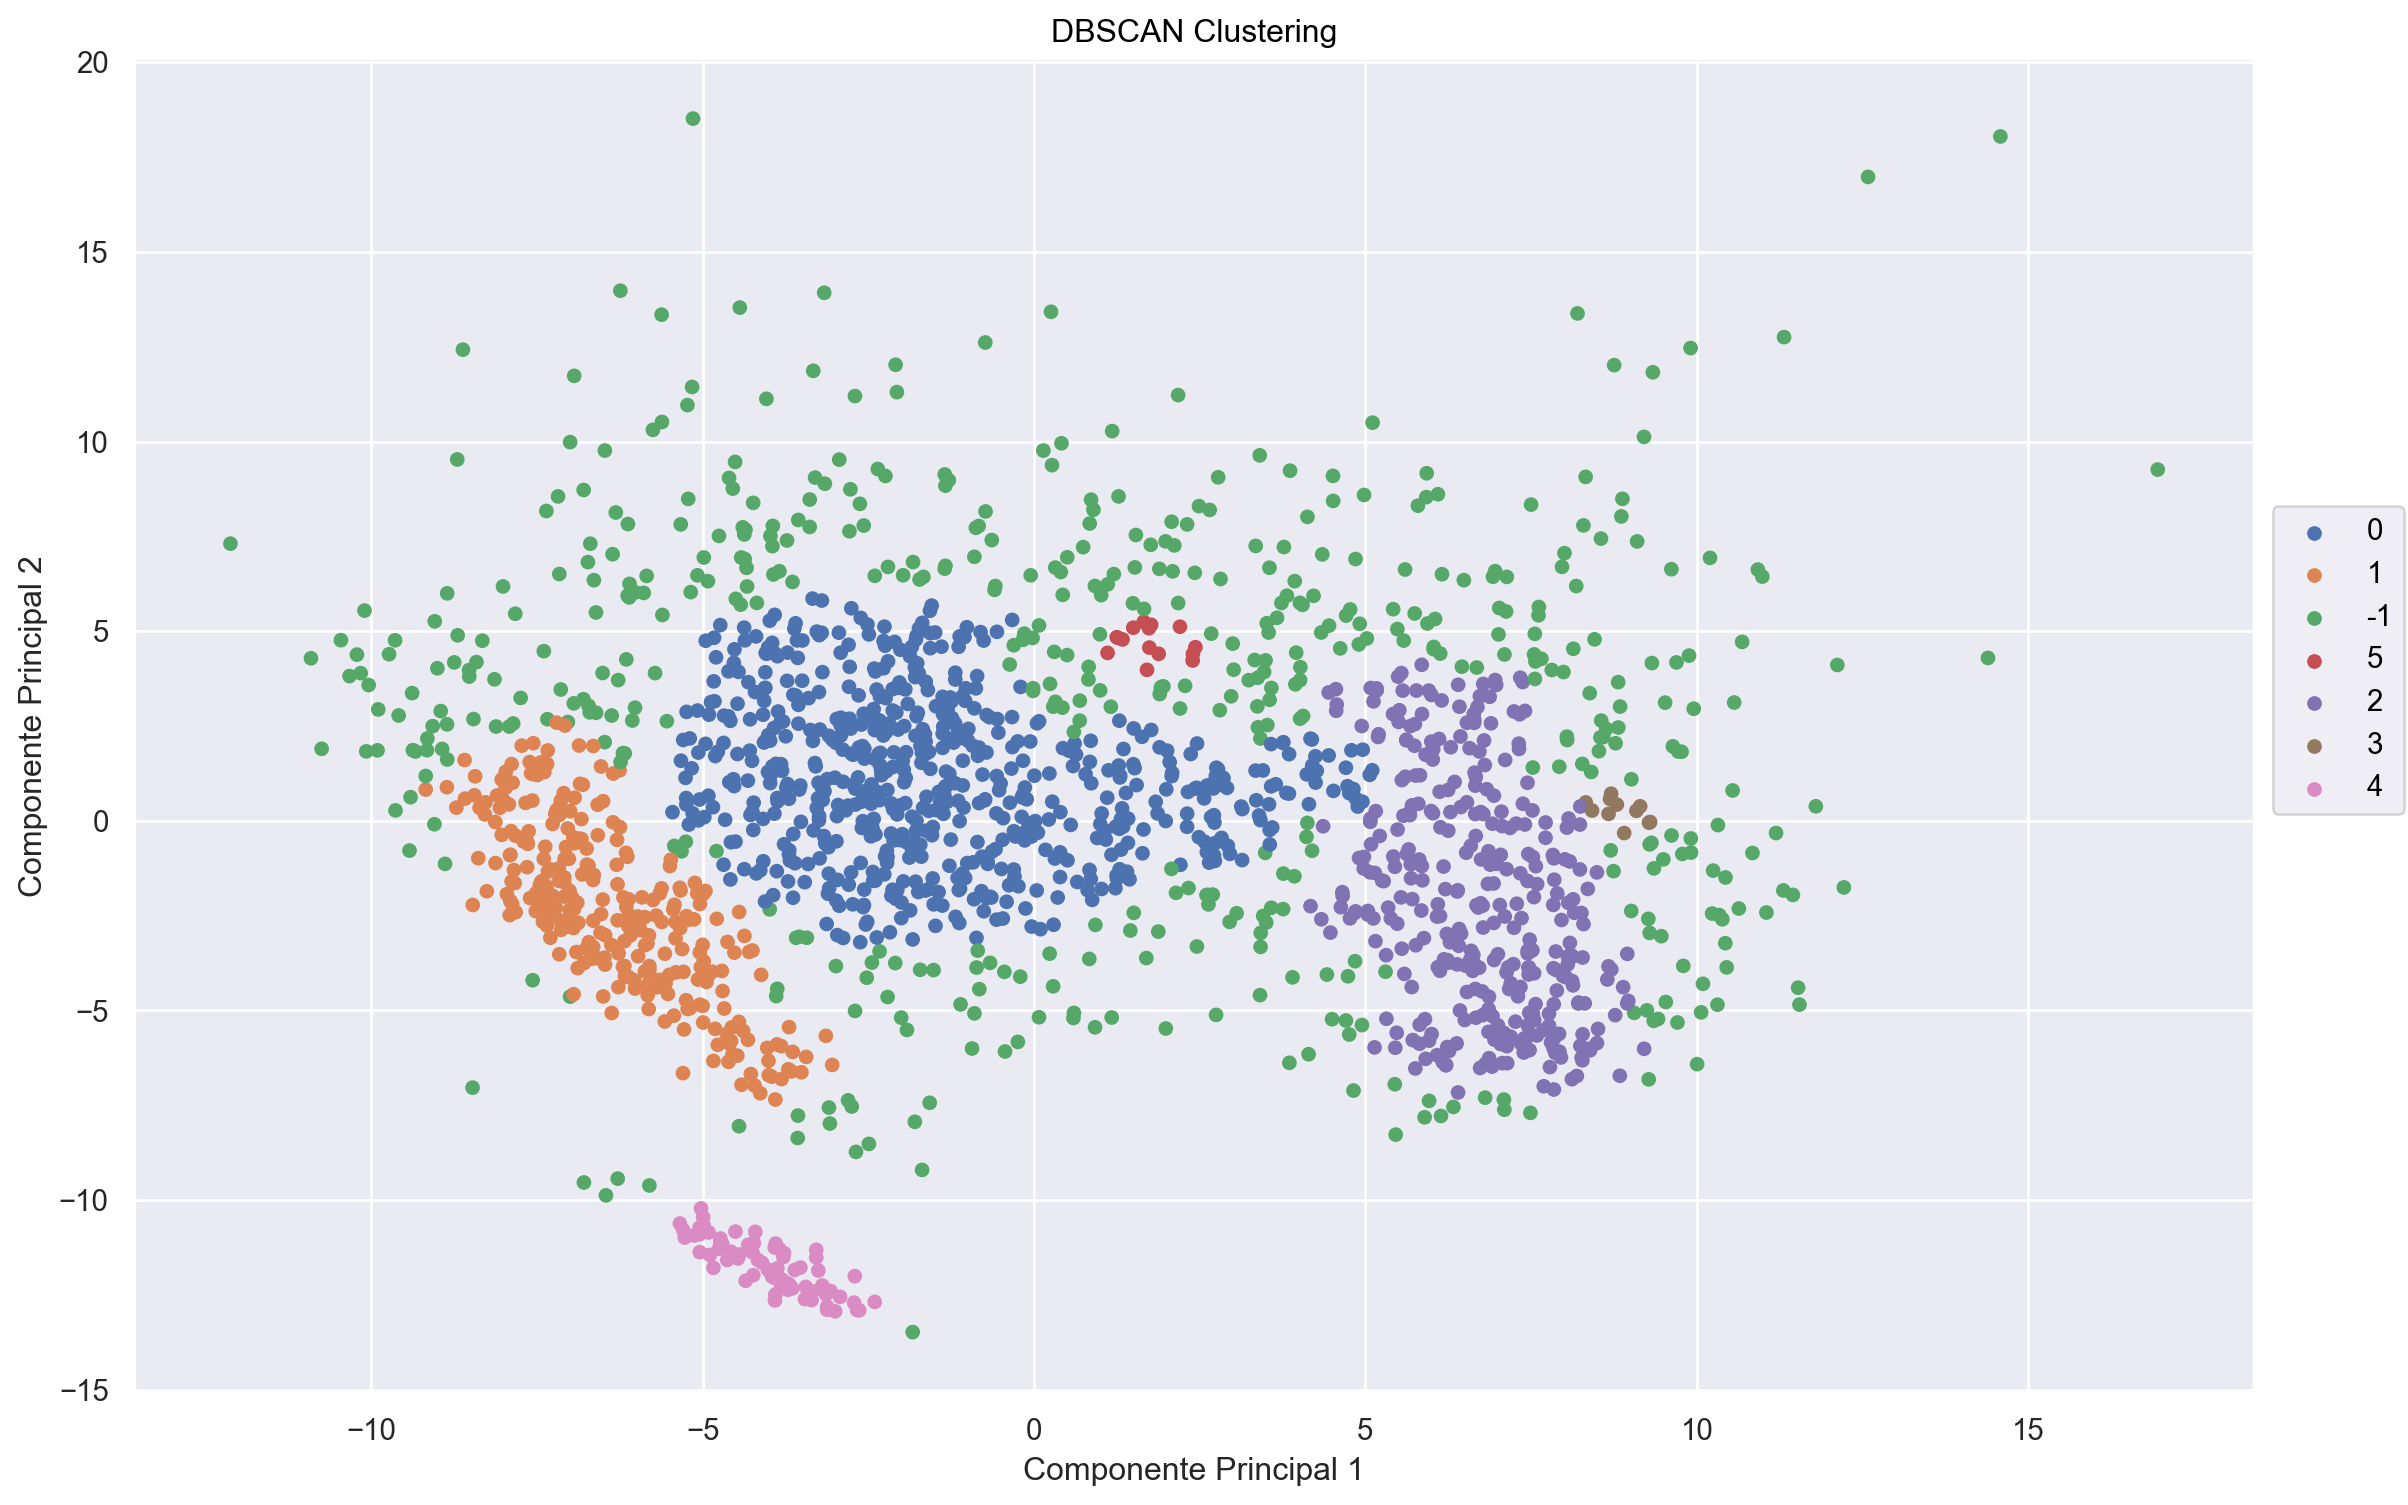

In [26]:
dbscan = DBSCAN(eps=0.75, min_samples=15)
etiquetas = dbscan.fit_predict(componentes_principales)

(
    so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
    .layout(size=(12,8))
    .add(so.Dot(pointsize=5), color = etiquetas.astype('str'))
    .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='DBSCAN Clustering'
    )
)

### (e) Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente.

- ¿Con cual de las dos opciones obtienen mejores resultados?

## Clasificacion

#### Ahora queremos poder predecir la posici´on en la que juega cada jugador seg´un sus datos estad´ısticos utilizando KNN. En la columna Pos encontramos la posici´on de los jugadores. Para la mayor´ıa de los jugadores se indica una ´unica posici´on pero algunos jugadores tienen dos posiciones. Para simplificar el an´alisis vamos a considerar una ´unica posici´on por jugador.

##### (a) Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posici´on (pueden quedarse s´olo con la primera posici´on de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren m´as conveniente).

In [63]:
# Cargar el dataset
data = pd.read_csv('./FBRef2020-21.csv')

# Filtrar jugadores con más de 500 minutos jugados
data = data[data['Min'] >= 500]

# Eliminar columnas con más de 100 datos faltantes y luego filas con datos faltantes
data = data.dropna(thresh=len(data) - 100, axis=1).dropna()

# Resetear los índices
data.reset_index(drop=True, inplace=True)

# Definir el DataFrame data_num con solo las variables numéricas desde la columna Ast/90 en adelante
data_num = data.loc[:, 'Ast/90':].apply(pd.to_numeric)

# Definir la variable Pos_filt
data['Pos_filt'] = data['Pos'].apply(lambda x: x.split(',')[0])

#### (b) Construir el DataFrame data_clasif que resulta de agregarle la columna de Pos_filt al DataFrame data_num. Dividir data_num en un 80% para entrenamiento y un 20% para testeo.

In [64]:
# Construir el DataFrame data_clasif
data_clasif = data_num.copy()
data_clasif['Pos_filt'] = data['Pos_filt']

# Dividir data_clasif en 80% entrenamiento y 20% testeo
from sklearn.model_selection import train_test_split

X = data_clasif.drop(columns=['Pos_filt'])
y = data_clasif['Pos_filt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### (c) Aplicar un esquema de validaci´on en el conjunto de entrenamiento para seleccionar el valor ´optimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor m´aximo de K = 20.)

##### Sugerencia: puede resultar de ayuda KNeighborsClassifier de sklearn e investigar esa librer´ıa para aplicar esquemas de validaci´on.


In [65]:
# Encontrar el valor óptimo de K
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determinar el mejor valor de K
best_k = k_values[cv_scores.index(max(cv_scores))]
best_k


7

##### (d) Para el valor de K obtenido, ¿cu´al es el porcentaje de aciertos en el conjunto de testeo?

In [66]:
# Entrenar y evaluar el modelo con el mejor valor de K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accuracy


0.8162729658792651

#### (e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

In [67]:

# Aplicar PCA y obtener las dos primeras componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Validación y selección de K para los datos PCA
cv_scores_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train_pca, cv=10, scoring='accuracy')
    cv_scores_pca.append(scores.mean())

best_k_pca = k_values[cv_scores_pca.index(max(cv_scores_pca))]

# Entrenar y evaluar el modelo con el mejor valor de K para los datos PCA
knn_pca = KNeighborsClassifier(n_neighbors=best_k_pca)
knn_pca.fit(X_train_pca, y_train_pca)
accuracy_pca = knn_pca.score(X_test_pca, y_test_pca)
accuracy_pca


0.7322834645669292

##### Podemos ver que el porcentaje de aciertos es mayor usando KKN con un 81.62% de aciertos contra el 73.23% de aciertos que tuvo el método PCA.

#### Ejercicio 8: Clasificación con el dataset de la liga inglesa femenina


Preparación de los datos


In [105]:
# Cargar el dataset de la liga inglesa femenina
superleague_data = pd.read_csv('./superleague2023.csv')


# superleague_data

In [106]:
# Filtrar las columnas necesarias
superleague_data_num = superleague_data.drop(columns=['Rk', 'Player', 'Nation', 'Squad', 'Age', 'Born'])

# Definir la variable Pos_filt
superleague_data_num['Pos_filt'] = superleague_data_num['Pos'].apply(lambda x: x.split(',')[0])

# Eliminar la columna 'Pos'
superleague_data_num = superleague_data_num.drop(columns=['Pos'])

superleague_data_num = superleague_data_num.replace(',', '.', regex=True)


In [107]:
# from sklearn.preprocessing import OneHotEncoder

# # Crear el OneHotEncoder con drop='first'
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# # Transformar la columna categórica
# encoded_letras = encoder.fit_transform(superleague_data_num[['Pos_filt']])

# # Crear un DataFrame con las columnas codificadas
# encoded_letras_df = pd.DataFrame(encoded_letras, columns=encoder.get_feature_names_out(['Pos_filt']))

# # Combinar el DataFrame original con el DataFrame codificado
# superleague_data_num = pd.concat([superleague_data_num[['MP']], encoded_letras_df], axis=1)

# superleague_data_num




In [108]:


# Construir el DataFrame data_clasif
superleague_data_num = superleague_data_num.apply(pd.to_numeric)
superleague_data_clasif = superleague_data_num.copy()
superleague_data_clasif['Pos_filt'] = superleague_data_num['Pos_filt']

# Construir el DataFrame data_clasif
superleague_data_num = superleague_data_num.apply(pd.to_numeric)
superleague_data_clasif = superleague_data_num.copy()
superleague_data_clasif['Pos_filt'] = superleague_data_num['Pos_filt']

# Dividir data_clasif en 80% entrenamiento y 20% testeo
X_superleague = superleague_data_clasif.drop(columns=['Pos_filt'])
y_superleague = superleague_data_clasif['Pos_filt']

X_train_superleague, X_test_superleague, y_train_superleague, y_test_superleague = train_test_split(X_superleague, y_superleague, test_size=0.2, random_state=42)


ValueError: Unable to parse string "MF" at position 0

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,PrgC,PrgP,PrgR,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,11,0,87,1.0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2,2,11,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,1,0,6,0.1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,1,0,1,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,16,10,923,10.3,1,2,3,1,0,0,4,0,0.4,0.4,1.2,1.6,11,71,12,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,6,4,296,3.3,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,3,13,5,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2,1,118,1.3,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,2,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,DF
300,22,22,"1,980",22.0,1,6,7,0,1,1,3,0,1.6,0.8,5.9,6.7,3,152,34,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30,MF
301,20,18,"1,568",17.4,0,1,1,0,0,0,3,0,0.5,0.5,1.0,1.5,9,89,29,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09,MF
302,18,18,"1,620",18.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,GK


Validación y selección de K


In [35]:
# Validación y selección de K para los datos de la liga femenina
cv_scores_superleague = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_superleague, y_train_superleague, cv=10, scoring='accuracy')
    cv_scores_superleague.append(scores.mean())

best_k_superleague = k_values[cv_scores_superleague.index(max(cv_scores_superleague))]

# Entrenar y evaluar el modelo con el mejor valor de K para los datos de la liga femenina
knn_superleague = KNeighborsClassifier(n_neighbors=best_k_superleague)
knn_superleague.fit(X_train_superleague, y_train_superleague)
accuracy_superleague = knn_superleague.score(X_test_superleague, y_test_superleague)
accuracy_superleague


TypeError: '<' not supported between instances of 'str' and 'float'

## Recomendacion de Jugadores

Ejercicio 9: Recomendaciones de jugadores
Para este ejercicio, comenzaré cargando y preprocesando el dataset transfermarkt_fbref_201920.csv y procederé con los pasos indicados.

Preparación de los datos


In [ ]:
# Cargar el dataset transfermarkt_fbref_201920
transfermarkt_data = pd.read_csv('/mnt/data/transfermarkt_fbref_201920.csv', delimiter=';')

# Filtrar los datos necesarios
transfermarkt_data = transfermarkt_data.dropna(subset=['value'])

# Convertir las columnas a tipos apropiados
transfermarkt_data = transfermarkt_data.apply(pd.to_numeric, errors='ignore')


(a) Recomendación de jugador similar a Messi
Para identificar jugadores con características similares a Messi pero de menor valor, seguiremos estos pasos:

Filtrar los datos de Messi
Calcular las distancias a otros jugadores
Recomendar jugadores similares de menor valor

In [ ]:
# Identificar a Messi en el dataset
messi_data = transfermarkt_data[transfermarkt_data['Player'] == 'Lionel Messi']

# Seleccionar características relevantes (exceptuando la columna de valor y el nombre del jugador)
features = transfermarkt_data.columns.difference(['Player', 'value'])

# Filtrar jugadores con valor menor a Messi
messi_value = messi_data['value'].values[0]
similar_players = transfermarkt_data[transfermarkt_data['value'] < messi_value]

# Calcular distancias euclidianas
from sklearn.metrics.pairwise import euclidean_distances

messi_features = messi_data[features].values
similar_players_features = similar_players[features].values

distances = euclidean_distances(messi_features, similar_players_features)

# Obtener el índice del jugador más similar
closest_player_index = distances.argmin()
recommended_player = similar_players.iloc[closest_player_index]

recommended_player[['Player', 'value']]


b) Modelo para detectar jugadores "baratos"
Para desarrollar un modelo que prediga el valor de mercado de los jugadores, utilizaremos un modelo de regresión. Aquí usaremos un modelo de regresión lineal como ejemplo.

In [ ]:
from sklearn.linear_model import LinearRegression

# Definir las características (incluyendo la edad)
features_with_age = features.tolist() + ['Age']
X_value = transfermarkt_data[features_with_age]
y_value = transfermarkt_data['value']

# Dividir los datos en entrenamiento y testeo
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(X_value, y_value, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_value, y_train_value)

# Predicciones
y_pred_value = model.predict(X_test_value)

# Calcular el error medio absoluto
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_value, y_pred_value)
mae


(c) Identificar jugadores sobrevalorados e infravalorados
Utilizando las predicciones del modelo, podemos calcular la diferencia entre el valor de mercado real y el predicho para identificar jugadores sobrevalorados e infravalorados.

In [ ]:
# Calcular las diferencias entre el valor real y el predicho
transfermarkt_data['pred_value'] = model.predict(X_value)
transfermarkt_data['difference'] = transfermarkt_data['value'] - transfermarkt_data['pred_value']

# Jugador más sobrevalorado
most_overvalued = transfermarkt_data[transfermarkt_data['value'] > 100000].nlargest(1, 'difference')
most_overvalued[['Player', 'value', 'pred_value', 'difference']]

# Jugador más infravalorado
most_undervalued = transfermarkt_data[transfermarkt_data['value'] > 100000].nsmallest(1, 'difference')
most_undervalued[['Player', 'value', 'pred_value', 'difference']]


(d) Recomendación de reemplazo para Mbappé
Para recomendar jugadores similares a Mbappé, seguimos un enfoque similar al de Messi. Luego, seleccionamos al jugador más recomendado basándonos en el valor predicho.

In [ ]:
# Identificar a Mbappé en el dataset
mbappe_data = transfermarkt_data[transfermarkt_data['Player'] == 'Kylian Mbappé']

# Filtrar jugadores con valor menor a Mbappé
mbappe_value = mbappe_data['value'].values[0]
similar_players_mbappe = transfermarkt_data[transfermarkt_data['value'] < mbappe_value]

# Calcular distancias euclidianas
mbappe_features = mbappe_data[features].values
similar_players_mbappe_features = similar_players_mbappe[features].values

distances_mbappe = euclidean_distances(mbappe_features, similar_players_mbappe_features)

# Obtener los índices de los 10 jugadores más similares
closest_players_indices_mbappe = distances_mbappe.argsort()[0][:10]
recommended_players_mbappe = similar_players_mbappe.iloc[closest_players_indices_mbappe]

# Seleccionar al jugador recomendado basado en el valor predicho
recommended_player_mbappe = recommended_players_mbappe.iloc[recommended_players_mbappe['difference'].idxmin()]

recommended_player_mbappe[['Player', 'value', 'pred_value', 'difference']]


Resumen de los resultados
Jugador recomendado para reemplazar a Messi: recommended_player
Modelo de predicción del valor de mercado: MAE del modelo mae
Jugador más sobrevalorado: most_overvalued
Jugador más infravalorado: most_undervalued
Jugador recomendado para reemplazar a Mbappé: recommended_player_mbappe